In [1]:
# Setr PYTHON PATH for JUPTERLAB to local env
import sys
sys.path.append("D://dev//devroot//RL-Intuition")
#or add to JUPYTER_PATH env var
print(sys.path)

['D:\\Dev\\devroot\\AI-Intuition', 'D:\\Dev\\devroot\\AI-Intuition\\journey11\\src\\experiments\\protokafka', 'D:\\Conda\\envs\\jlab_tf2_gpu\\python36.zip', 'D:\\Conda\\envs\\jlab_tf2_gpu\\DLLs', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib', 'D:\\Conda\\envs\\jlab_tf2_gpu', '', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib\\site-packages', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib\\site-packages\\win32', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib\\site-packages\\win32\\lib', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib\\site-packages\\Pythonwin', 'D:\\Conda\\envs\\jlab_tf2_gpu\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\parri\\.ipython', 'D://dev//devroot//RL-Intuition']


In [18]:
import copy
import re
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from matplotlib.pyplot import FormatStrFormatter
from src.tictactoe.util.vals_json import ValsJson
from IPython.display import clear_output

In [ ]:
x = ValsJson.load_values_from_json("..//data/q_conv_e2bd781387bd40ef893bbb05a6084ed2.json")

In [ ]:
cropped = list()
for a in x:
    if type(a) == list:
        cropped.append(a)
x = cropped

In [ ]:
diff = np.zeros((len(x), len(x[0])-1))
j = 0
for a in x:
    if type(a) == type([]):
        for i in range(0, len(a)-1):
            diff[j][i] = abs(a[i+1] - a[i])
        j += 1


In [ ]:
keep = np.zeros((len(x)))
threshold = 0.0001
i = 0
for d in diff:
    j = len(d)
    for v in reversed(d):
        if keep[i] == 0 and v > threshold:
            keep[i] = j
        j -= 1
    i += 1
print(keep)

In [ ]:
def plot_convergence(level, x1, ax1, x2, ax2):
    ax1_color = 'tab:red'
    ax2_color = 'tab:blue'
    ax1.set_title("Level {}".format(level))
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('Q Value', color=ax1_color)
    ax1.plot(x1, color=ax1_color)
    ax1.tick_params(axis='y', labelcolor=ax1_color)
    ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

    ax2.set_ylabel('Q Diff', color=ax2_color)
    #ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax2.plot(x2, color=ax2_color)
    ax2.tick_params(axis='y', labelcolor=ax2_color)
    return

In [ ]:
k = 2000
plt.rcParams['figure.figsize'] = [40/2.54, 25/2.54]
fig, ax = plt.subplots(ncols=3, nrows=3, constrained_layout=True)
for i in range(3):
    for j in range(3):
        level = (3*i)+(j+1)-1
        plot_convergence(level,
                         x[level][:int(keep[level])], ax[i, j], 
                         diff[level][:int(keep[level])], ax[i, j].twinx())
plt.show()

In [3]:
## Load Hello World Training summary
context_name = 'Detecting-Lesa'
hello_world_data = ValsJson.load_values_from_json("..//data/{}/summary.json".format(context_name))
print("Convert all summary data to numpy array:")
for k in hello_world_data.keys():
    print("\t{}".format(k))
    hello_world_data[k] = np.asarray(hello_world_data[k])

Convert all summary data to numpy array:
	prediction_interim_0000
	prediction_interim_0009
	prediction_interim_0035
	prediction_interim_0081
	prediction_interim_0147
	prediction_interim_0239
	prediction_interim_0362
	prediction_interim_0523
	x_test
	y_test
	predictions
	loss
	x_train
	y_train


In [4]:
def loss_pct_point(data:np.ndarray,
                   pct:np.float = 0.05) -> int:
    """
    Return the first point in the data where the data value drops below the given % of the data range
    """
    threshold = (np.max(data) - np.min(data)) * pct
    i = 0
    len_data = len(data)
    while data[i] > threshold and i < len_data:
        i+= 1
    if i > (len_data) / 2:
        i = 0
    return i

In [5]:
def plot_loss(loss, ax1):
    ax1_color = 'tab:green'
    ax2_color = 'tab:blue'
    ax2 = ax1.twinx()

    ax1.set_title("loss")
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('loss', color=ax1_color)
    ax1.plot(loss, color=ax1_color)
    ax1.tick_params(axis='y', labelcolor=ax1_color)
    ax1.grid(b=True, color='cyan', alpha=0.2, linestyle=':', linewidth=2)
    
    ax2.set_ylabel('loss', color=ax2_color)
    loss_zoom = copy.deepcopy(loss)
    for i in range(0, loss_pct_point(loss)):
        loss_zoom[i] = None
    ax2.plot(loss_zoom, color=ax2_color)
    return

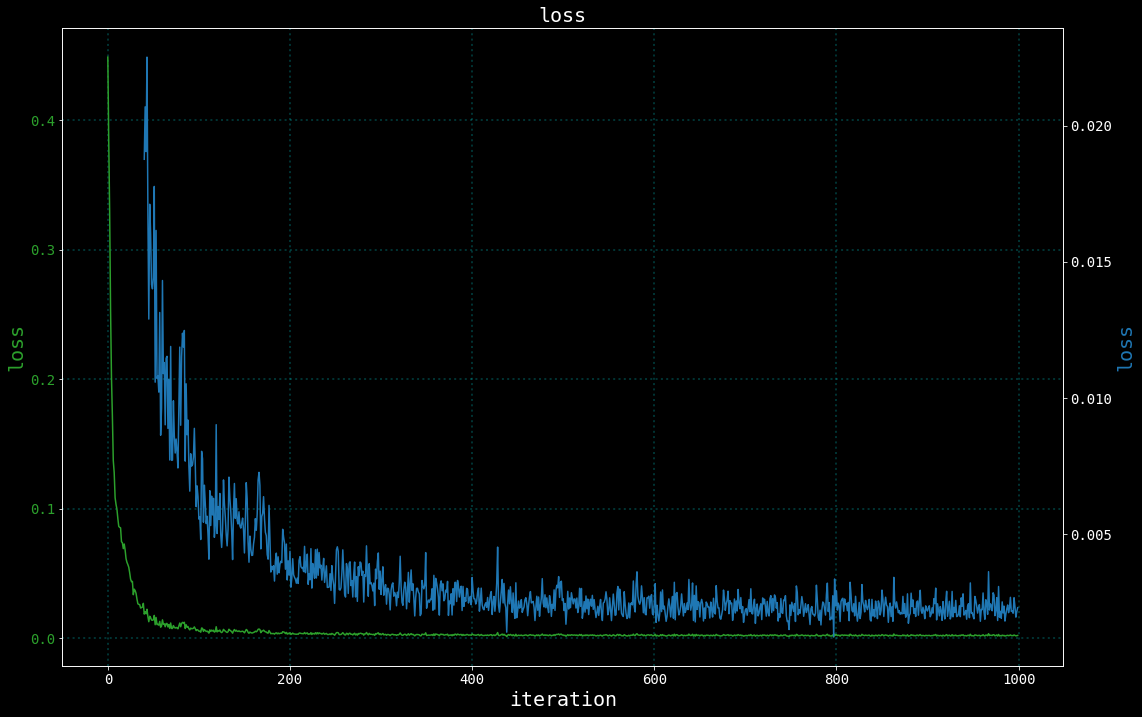

In [13]:
plt.rcParams['figure.figsize'] = [40/2.54, 25/2.54]
font = {'family' : 'DejaVu Sans Mono'}
plt.rc('font', **font)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
clear_output(wait=True)
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
    plot_loss(hello_world_data['loss'], ax)
    plt.show()

In [25]:
def plot_pred(y, pred_y, ax1, title):
    ax1_color = 'tab:green'
    ax2_color = 'tab:blue'
    err_color = 'yellow'
    err = -(np.asarray(y) - np.asarray(pred_y)).reshape(len(y))
    err = np.column_stack((np.zeros(len(err)), err)).transpose()
    ax1.set_title(title)
    ax1.set_xlabel('predicted y')
    ax1.set_ylabel('actual y', color=ax1_color)
    ax1.set_xlim([-1,1])
    ax1.set_ylim([-1,1])
    ax1.errorbar(pred_y, y, yerr=err, color=ax2_color, fmt='o', ecolor=err_color)
    ax1.tick_params(axis='y', labelcolor=ax1_color)
    ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2) 
    return

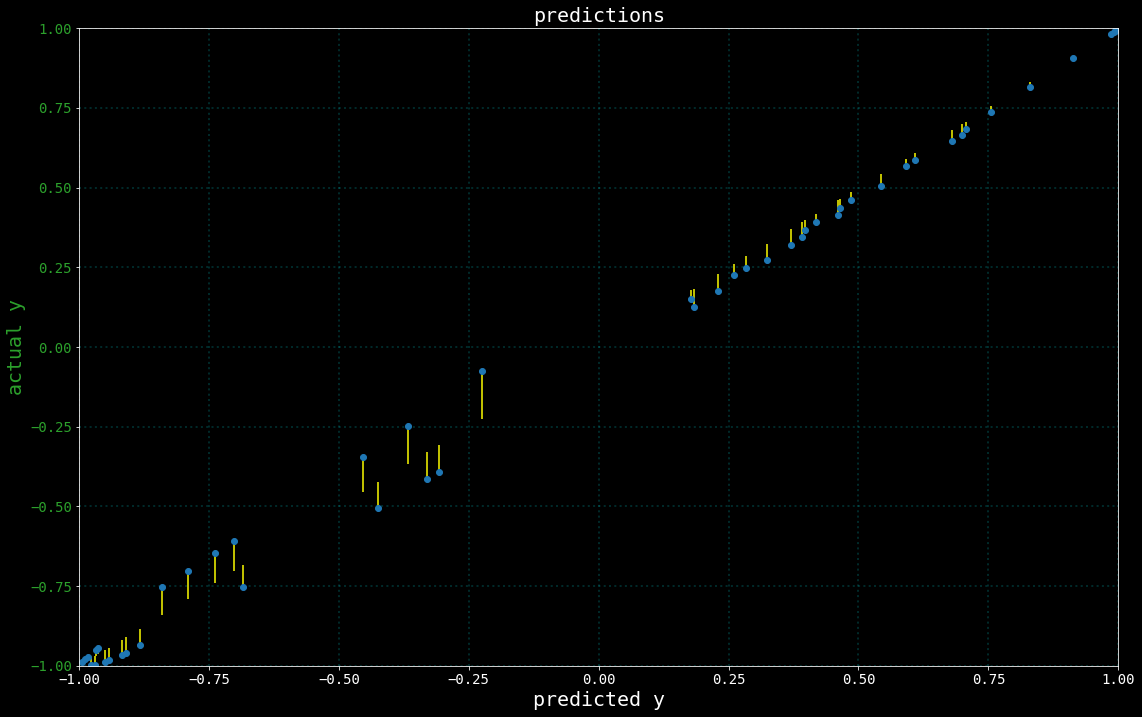

In [26]:
plt.rcParams['figure.figsize'] = [40/2.54, 25/2.54]

to_show = list(sorted([k for k, k in enumerate(hello_world_data.keys()) if re.match(r'^prediction_interim_.*', k)]))
to_show.append('predictions')
with plt.style.context('dark_background'):
    for i in range(1):
        for itm in to_show:
            clear_output(wait=True)
            fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
            plot_pred(hello_world_data['y_test'], hello_world_data[itm], ax, itm)
            plt.show()
            sleep(1)

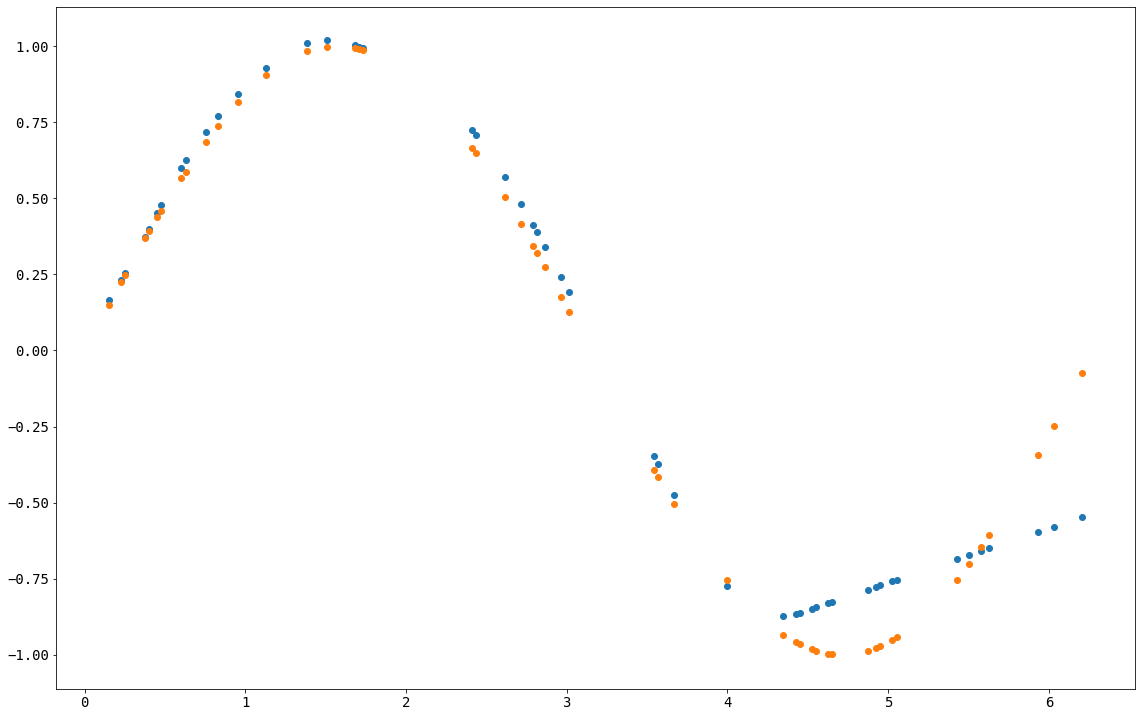

In [27]:
import random

xtr = hello_world_data['x_train']
xte = hello_world_data['x_test']
ytr = hello_world_data['y_train']
yte = hello_world_data['y_test']
prd = hello_world_data['prediction_interim_0035']


fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
ax.scatter(xte, prd)
ax.scatter(xte, yte)
plt.show()

#xtrf = (np.max(xtr) - np.min(xtr))/2
#xtef = (np.max(xte) - np.min(xte))/2
#ax.scatter((-xtr+(xtrf))/xtrf,ytr)
#ax.scatter((-xte+(xtrf))/xtrf,yte)
#plt.show()
